In [1]:
# basic
import pandas as pd
import numpy as np

# for plot
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

# machine learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# for plot decision tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

# Overview
- Apply logistic regression, decision tree, random forest, naive bayes, support vector machines and k-nearest neighbors on breast cancer data
- Extract feature importance
- Evaluate the classification accuracy of the algorithm

## Load data
1. Load in dataset from sklearn.datasets
2. Specify the name of the features/columns
3. Get the feature vector (X) and target vector (y)

In [2]:
# Load the data
breast_cancer = load_breast_cancer()
data = breast_cancer.data # data
print("Shape of breast cancer data", data.shape)
labels = breast_cancer.target
print("Shape of breast cancer labels", labels.shape)

# concatenate the data and labels along the second axis
labels = np.reshape(labels,(569,1))
data_and_label = np.concatenate([data, labels], axis=1)

# read in pandas DataFrame
df = pd.DataFrame(data_and_label)

# Append feature/column names
features_names = np.append(breast_cancer.feature_names, 'label')
df.columns = features_names

# Replace label with taget names
print("Classification Targets", breast_cancer.target_names)
df['label'].replace(0, 'Benign', inplace=True)
df['label'].replace(1, 'Malignant', inplace=True)

# show the first 6 rows of data
df.head(6)

Shape of breast cancer data (569, 30)
Shape of breast cancer labels (569,)
Classification Targets ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,Benign


In [3]:
# Specify the name of the target
target = 'label'

# Get the target vector
y = df[target]

# Specify the name of the features
features = list(df.drop(target, axis=1).columns)

# Get the feature vector
X = df[features]

## Preprocess data
1. Encode the features and target
   - Get_dummies(X) one-hot-encoding if features are categorical.
   - Normalize the data onto unit scale (mean=0 and variance=1) if features are numeric.
2. Randomly choose 30% of the data for testing
   - Use stratify=y (in order to obtain the same result)
   - This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [4]:
X = StandardScaler().fit_transform(X) # normalizing the features
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [5]:
# Declare the LabelEncoder
class_encoder = LabelEncoder()

# Enclode the target
y = class_encoder.fit_transform(y)

In [6]:
# Randomly choose 30% of the data for testing (set randome_state and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666, stratify=y)

# Step 3:  train, test, and evaluate
1. Train and test logistic regression, decision tree, and random forest
    - for decision tree: plot the decision tree using graphviz
    - for random forest: plot the bar chart of feature importances (sorted in descending order)
2. Evaluate the performance of the classifiers based on classification accuracy
    - plot the bar chart of accuracies (sorted in descending order)

In [7]:
def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier()
    
    # Train the model
    clf.fit(X_train, y_train)
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    
    # Update the list of accuracies
    accuracies.append(clf.score(X_test, y_test))

In [8]:
# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, SVC, KNeighborsClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)

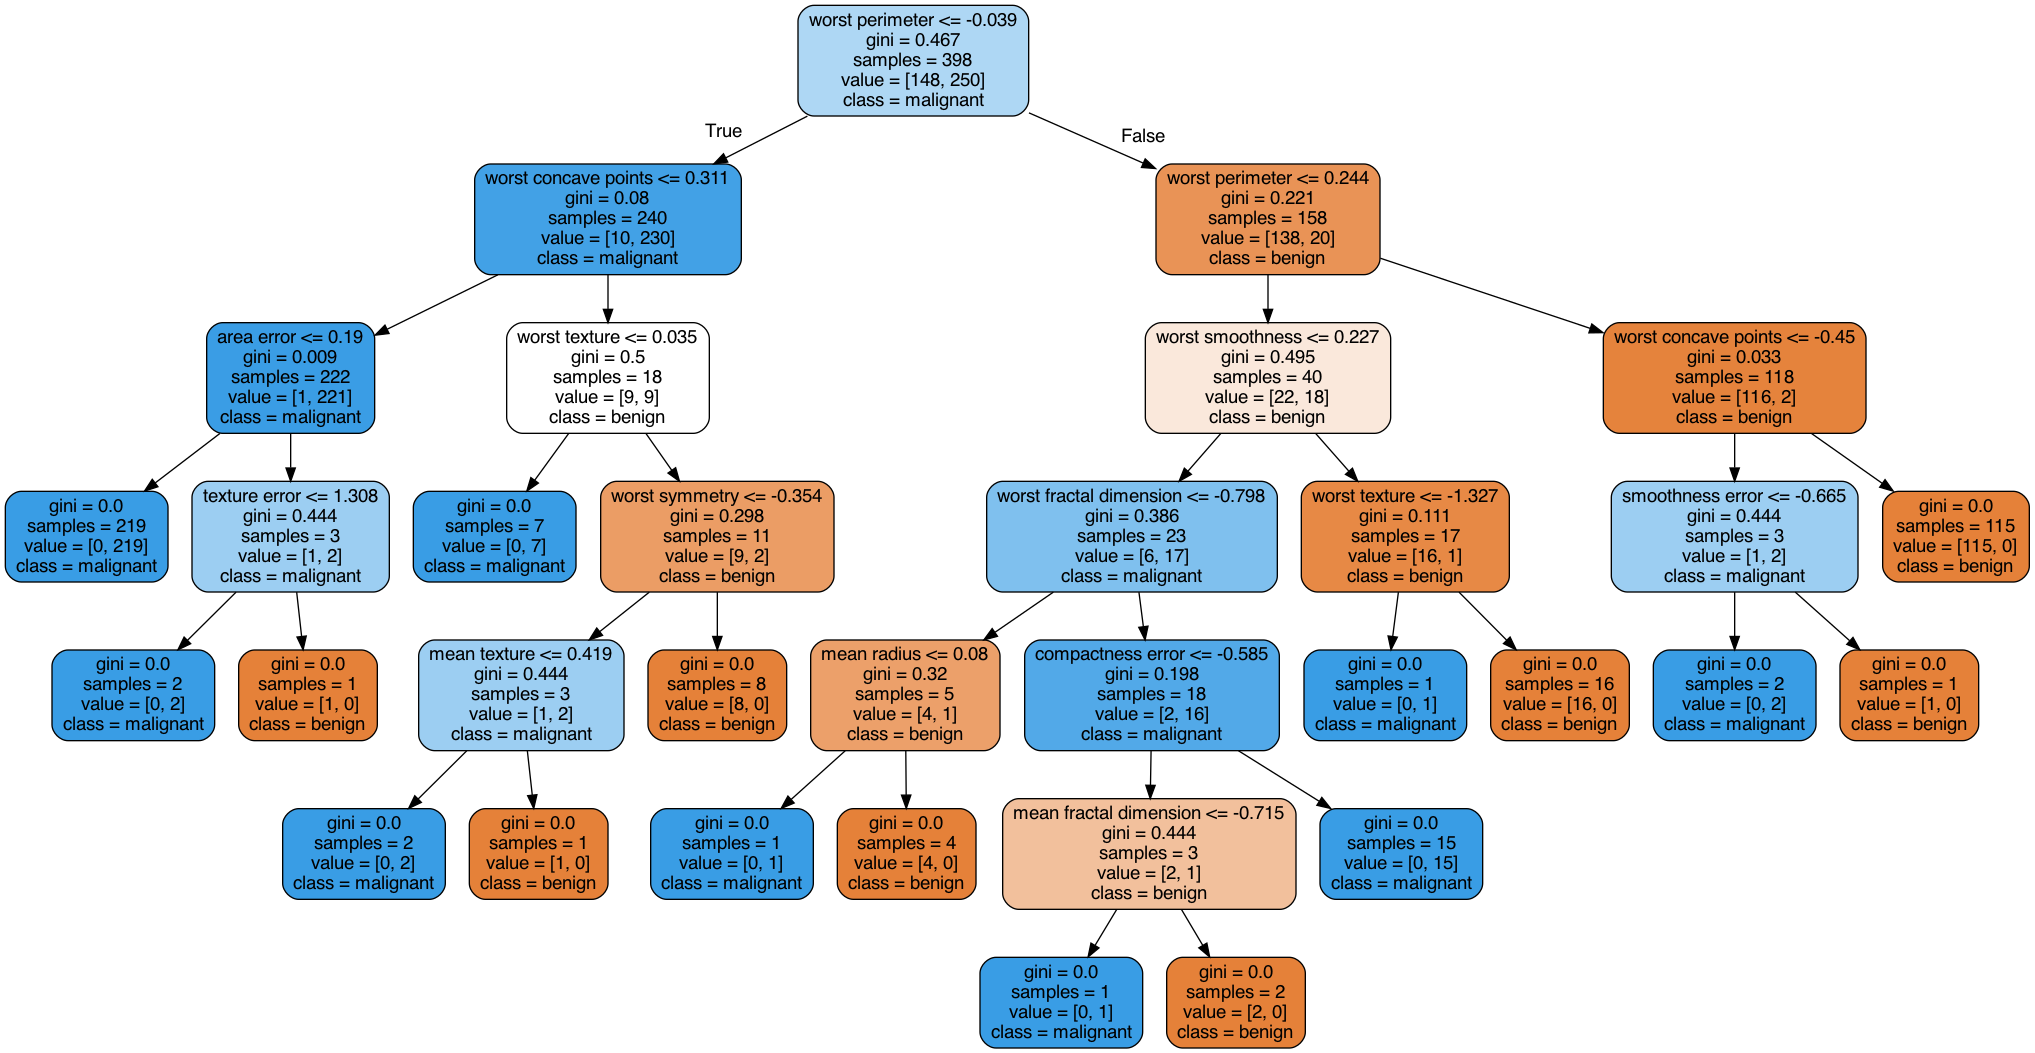

In [9]:
# plot decision tree
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['benign', 
                                        'malignant'],
                           feature_names=features,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 
Image(graph.create_png()) 

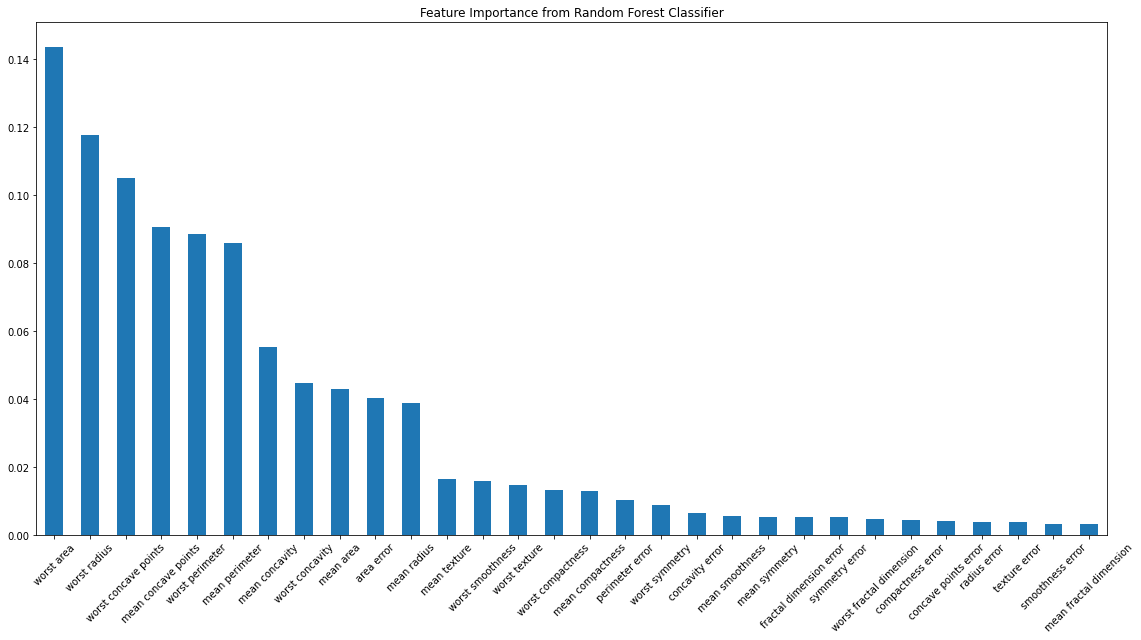

In [10]:
# Convert the importances into one-dimensional 1d-array with corresponding df column names as axis labels
f_importances = pd.Series(importances, features)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

# Show the plot
plt.title("Feature Importance from Random Forest Classifier")
plt.tight_layout()
plt.show()

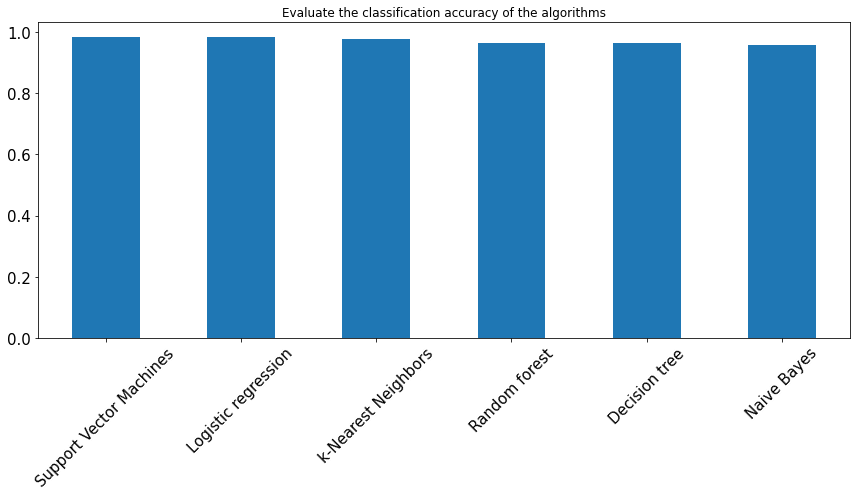

In [11]:
# Convert the accuracies into one-dimensional 1darray with corresponding classifier names as axis labels
clf_accuracies = pd.Series(accuracies, ['Logistic regression', 'Decision tree', 'Random forest', 
                                        'Naive Bayes', 'Support Vector Machines', 'k-Nearest Neighbors'])

# Sort the array in descending order of the accuracies
clf_accuracies = clf_accuracies.sort_values(ascending=False)

# Draw the bar plot from clf_accuracies 
clf_accuracies.plot(x='Classifiers', y='Accuracy', kind='bar', figsize=(12,7), rot=45, fontsize=15)

# Show the plot
plt.title("Evaluate the classification accuracy of the algorithms")
plt.tight_layout()
plt.show()

In [12]:
clf_accuracies

Support Vector Machines    0.982456
Logistic regression        0.982456
k-Nearest Neighbors        0.976608
Random forest              0.964912
Decision tree              0.964912
Naive Bayes                0.959064
dtype: float64

# More on Classification Metrics

In [13]:
seed = 666
model = LogisticRegression() 
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[ 62   2]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [14]:
kfold = KFold(n_splits=10)
model = LogisticRegression()

results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') 
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

results = cross_val_score(model, X, y, cv=kfold, scoring='log_loss') 
print(("Logloss: %.3f (%.3f)") % (results.mean(), results.std()))

results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.977 (0.014)
Logloss: -0.084 (0.045)
AUC: 0.995 (0.005)


# Thoughts: 
## Evaluate the Performance of Machine Learning Algorithms with Resampling
- Train and Test Sets (what we used)
- k-fold Cross Validation
- Leave One Out Cross Validation
- Repeated Random Test-Train Splits

### k-fold Cross Validation
- Estimate the performance of a machine learning algorithm with less variance than a single train-test set split. 
- Procedure:
    - Splitting the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. 
    - The algorithm is trained on k − 1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set. After running cross validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.

The result is a more reliable estimate of the performance of the algorithm on new data. 
It is more accurate because the algorithm is trained and evaluated multiple times on different data. 

Typical values for k are k=3, k=5, and k=10, with 10 representing the most common value. This is because, given extensive testing, 10-fold cross-validation provides a good balance of low computational cost and low bias in the estimate of model performance as compared to other k values and a single train-test split.

In [ ]:
# k-fold Cross Validation: 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
kfold = KFold(n_splits = num_folds, random_state=666)
model = LogisticRegression() # for example
results = cross_val_score(model, X, Y, cv=kfold)

### Leave One Out Cross Validation
- Configure cross validation so that the size of the fold is 1 (k is set to the number of observations in the dataset).
- The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data. 
- A downside is that it can be a computationally more expensive procedure than k-fold cross validation. In the example below we use leave-one-out cross validation.

In [ ]:
# Leave One Out Cross Validation:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression() # for example
results = cross_val_score(model, X, Y, cv=loocv)

### Repeated Random Test-Train Splits
Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation. 

This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation. You can also repeat the process many more times as needed to improve the accuracy. A down side is that repetitions may include much of the same data in the train or the test split from run to run, introducing redundancy into the evaluation. The example below splits the data into a 67%/33% train/test split and repeats the process 10 times.

In [ ]:
# Repeated Random Test-Train Splits:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
n_splits = 10
kfold = ShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=666) 
model = LogisticRegression() # for example
results = cross_val_score(model, X, Y, cv=kfold)